# **[Computational Social Science] Project 5: Natural Language Processing**
Group members: 	Juana, Christina, Chris

# **Part 3:** Pre-processing

##Libraries

In [ ]:
!pip install --upgrade gensim
!pip install tqdm
!pip install adjustText
!pip install multiprocessing
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 KB 11.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-g

In [ ]:
# pandas and numpy
import pandas as pd
import numpy as numpy

# punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

# textblob
from textblob import TextBlob

# countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, det_curve, f1_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.manifold import TSNE

import multiprocessing

from scipy import stats

# gensim
import gensim
from gensim import models
import pickle
from gensim.models import Word2Vec
import multiprocessing
from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
import scattertext as st
import spacy
from scattertext import SampleCorpora, produce_scattertext_explorer
from scattertext import produce_scattertext_html
from scattertext.CorpusFromPandas import CorpusFromPandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import importlib

# check if the package is already installed
try:
    importlib.import_module('tensorflow')
    import tensorflow as tf
    print('tensorflow already installed')
except ImportError:
    # if the package is not installed, install it
    ! pip install tensorflow
    import tensorflow as tf
    print('Package installed successfully')

tensorflow already installed


##Data

In [ ]:
import os

current_directory = os.getcwd()

chris_directory = "/content/drive/Othercomputers/My MacBook Pro/Documents/School/Grad/SOC_273_Proj/Computational_Social_Science_Project_5/data"
os.chdir(chris_directory)

current_directory = os.getcwd()

print(current_directory)

/content/drive/Othercomputers/My MacBook Pro/Documents/School/Grad/SOC_273_Proj/Computational_Social_Science_Project_5/data


In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import os
current_directory = os.getcwd()
christina_directory = "/content/gdrive/MyDrive/CSS/Project5/data"
os.chdir(christina_directory)
current_directory = os.getcwd()
print(current_directory)

/content/gdrive/MyDrive/CSS/Project5/data


In [ ]:
import os
current_directory = os.getcwd()
juana_directory = "/content/drive/MyDrive/Demography/Spring 2023/SOC 273M/Project_5/Computational Social Science Project 5/data" 
os.chdir(juana_directory)
current_directory = os.getcwd()
print(current_directory)

/content/drive/MyDrive/Demography/Spring 2023/SOC 273M/Project_5/Computational Social Science Project 5/data


In [ ]:
congress_tweets = pd.read_csv("116th Congressional Tweets and Demographics.csv")
# fill in this line of code with a sufficient number of tweets, depending on your computational resources
#congress_tweets = congress_tweets.sample(...)
congress_tweets.head(300)

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.085310e+18,RepByrne,2019-01-15T18:06:15-05:00,How do the Dems expect the shutdown to end whe...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
296,1.085240e+18,RepByrne,2019-01-15T13:38:53-05:00,RT @MayorStimpson Mobile is on a path to becom...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
297,1.085210e+18,RepByrne,2019-01-15T11:09:33-05:00,I also want to express my gratitude to Governo...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
298,1.085340e+18,RepMoBrooks,2019-01-15T19:52:52-05:00,"RT @mtelford_cis @RepMoBrooks more than 2,000 ...",Mo Brooks,Rep,3-Jan-11,4/29/1954,M,AL,5,Republican,"1,318,255","729,547","795,696","1,255,925"


In [ ]:
print("Number of rows:", congress_tweets.shape[0])

Number of rows: 946791


In [ ]:
congress_tweets = congress_tweets.loc[~congress_tweets['text'].isin(['[removed]', '[deleted]' ]),:]
congress_tweets = congress_tweets.dropna(subset=['text']).reset_index()
congress_tweets.index

RangeIndex(start=0, stop=946791, step=1)

In [ ]:
congress_tweets['text'] = congress_tweets['text'].apply(lambda x: '' if 'RT' in str(x) else x)
congress_tweets = congress_tweets.replace('', pd.NA).dropna(subset=['text']).reset_index(drop=True)
congress_tweets = congress_tweets.dropna(subset=['text']).reset_index(drop=True)
print("Number of rows:", congress_tweets.shape[0])

Number of rows: 719513


In [ ]:
congress_tweets.head()

,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
0,0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
1,1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
2,3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
3,4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
4,5,1.080950e+18,RepByrne,2019-01-03T16:58:00-05:00,There is much in store for Alabama in 2019. Fr...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"


In [ ]:
import spacy
# Load the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

# Parse the first reddit post in the dataset
parsed_tweet = nlp(congress_tweets.text[0])
print(parsed_tweet)

Great news for Baldwin County! The economy of Southwest Alabama continues to thrive, and I am proud to support pro-growth policies in Washington to continue the economic boom.
https://lagniappemobile.com/booming-baldwin-continues-to-lead-state-economically/


In [ ]:
for idx, sentence in enumerate(parsed_tweet.sents):
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('')

Sentence 1
Great news for Baldwin County!

Sentence 2
The economy of Southwest Alabama continues to thrive, and I am proud to support pro-growth policies in Washington to continue the economic boom.
https://lagniappemobile.com/booming-baldwin-continues-to-lead-state-economically/



In [ ]:
import re
url_pattern = '(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])'

In [ ]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(congress_tweets, text_col='text'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in congress_tweets[text_col]:
        yield re.sub(pattern=url_pattern,
                     repl='',
                     string=text.replace('\n', ''))

def preprocess(congress_tweets, text_col='text', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to a dataframe."""
    for parsed in nlp.pipe(line_read(congress_tweets, text_col), batch_size=1000, disable=["tok2vec", "ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’","amp","qt"] 
                  and not lemma in allowed_postags
                  and not "www" in lemma
                  and not "https" in lemma
                  and not "http" in lemma
                  and not "com" in lemma]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]

        yield tokens

In [ ]:
lemmas = [line for line in preprocess(congress_tweets)]

In [ ]:
lemmas[0]

['great',
 'news',
 'baldwin',
 'county',
 'economy',
 'southwest',
 'alabama',
 'continues',
 'thrive',
 'proud',
 'support',
 'pro',
 'growth',
 'policies',
 'washington',
 'continue',
 'economic',
 'boom']

In [ ]:
parsed_tweet_test = nlp(congress_tweets.text[10])
print(parsed_tweet_test)
lemmas[10]

Glad we could honor Monroe County Probate Judge Greg Norris on his retirement. My Deputy District Director recently presented him with a Congressional Record entry honoring his years of service. http://pbs.twimg.com/media/DwA97eHU8AItbrq.jpg


['glad',
 'honor',
 'monroe',
 'county',
 'probate',
 'judge',
 'greg',
 'norris',
 'retirement',
 'deputy',
 'district',
 'director',
 'recently',
 'presented',
 'congressional',
 'record',
 'entry',
 'honoring',
 'years',
 'service']

In [ ]:
from gensim.models.phrases import Phrases, Phraser

bigram = Phrases(lemmas, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in lemmas]

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
trigrams_joined = [' '.join(trigram) for trigram in trigrams] #trigrams
trigrams_joined[0] #printing out the trigrams in post 1

'great news baldwin_county economy southwest_alabama continues thrive proud support pro_growth_policies washington continue economic_boom'

In [ ]:
[trigram for trigram in list(trigram_phraser.phrasegrams.keys()) if trigram.count('_') == 2]

In [ ]:
# Inserting next to selftext column
congress_tweets.insert(loc=17, column='lemmas', value=trigrams_joined)
# Removing empty rows in lemmas
congress_tweets = congress_tweets[~congress_tweets['lemmas'].isin([''])]

In [ ]:
%who

CountVectorizer	 Phraser	 Phrases	 STOP_WORDS	 TextBlob	 TfidfVectorizer	 bigram	 bigram_phraser	 christina_directory	 
clean	 congress_tweets	 current_directory	 drive	 en_core_web_sm	 gensim	 idx	 importlib	 lemmas	 
line_read	 models	 nlp	 numpy	 os	 parsed_tweet	 parsed_tweet_test	 pd	 plt	 
preprocess	 punctuation	 re	 sentence	 sns	 spacy	 tf	 trigram	 trigram_phraser	 
trigrams	 trigrams_joined	 url_pattern	 


In [ ]:
congress_tweets.head()

,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,lemmas
0,0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",great news baldwin_county economy southwest_al...
1,1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",outstanding news today @airbus @jetblue orderi...
2,3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",sign things democrats house taking action impe...
3,4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",let understand dealing border_security nationa...
4,5,1.080950e+18,RepByrne,2019-01-03T16:58:00-05:00,There is much in store for Alabama in 2019. Fr...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",store alabama infrastructure investing main_st...


In [ ]:
congress_tweets.to_csv('congress_tweets_lemmas.csv', index=False)

NameError: ignored

In [ ]:
congress_tweets.party.value_counts()

Democrat       468858
Republican     244013
Independent      3442
Name: party, dtype: int64

In [ ]:
from collections import Counter
result = preprocess(congress_tweets)
frequencies = Counter(word for sentence in result for word in sentence)
for tokens, frequency in frequencies.most_common(10):  # get the 10 most frequent words
    print(tokens, frequency)

today 100359
trump 70825
people 61574
act 59713
health 59477
need 59222
president 59051
work 54721
help 54295
house 50193


In [ ]:
congress_tweets.to_csv('congress_tweets_lemmas_trunc.csv', index=False)
congress_tweets = congressrev


# **Part 4:** Exploratory Data Analysis

In [ ]:
#congressrev = pd.read_csv("congress_tweets_lemmas_trunc.csv")

## EDA 1 - Word Cloud

In [ ]:
#congress_tweets = congress_tweets.drop(congress_tweets[congress_tweets['party'] == 'Independent'].index)
#
#democrats_df = congress_tweets[congress_tweets['party'] == 'Democrat']
#democrats_df = democrats_df.sample(n=5000, replace=False)
#democrats_df = democrats_df.reset_index()
#democrats_df = democrats_df.drop(democrats_df.columns[0], axis=1)
#
#republicans_df = congress_tweets[congress_tweets['party'] == 'Republican']
#republicans_df = republicans_df.sample(n=5000, replace=False)
#republicans_df = republicans_df.reset_index()
#republicans_df = republicans_df.drop(republicans_df.columns[0], axis=1)
#
#congress_tweets = pd.concat([republicans_df, democrats_df], ignore_index=True)

In [ ]:
#congressrev = congressrev.drop(213)
#congressrev = congressrev.drop(223)
#congressrev = congressrev.drop(222)

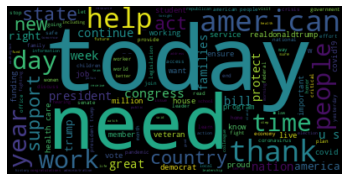

In [ ]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ' '.join(congress_tweets['lemmas'].map(lambda text: ''.join(text)))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## EDA 2 - Visualizing length of tweets

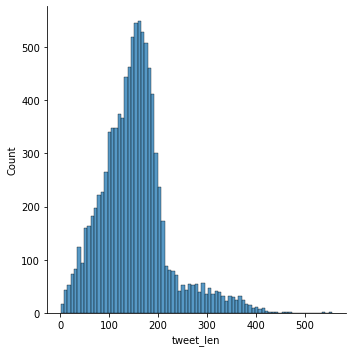

In [ ]:
congress_tweets['tweet_len'] = congress_tweets['lemmas'].apply(len)
sns.displot(congress_tweets, x="tweet_len")
plt.show()

#**Part 5**: Sentiment Analysis


##Two legislators

In [ ]:
congress_tweets['name_wikipedia'].unique() #unique words

array(['Kevin Cramer', 'Pete Stauber', 'Rob Wittman', 'Tom Rice',
       'Tim Scott', 'Marco Rubio', 'Steven Palazzo', 'Ted Cruz',
       'Andy Barr', 'Bill Cassidy', 'Thomas Massie', 'Jim Hagedorn',
       'Warren Davidson', 'Glenn Grothman', 'Lee Zeldin', 'Rodney Davis',
       'Robert Aderholt', 'Jackie Walorski', 'Steve Chabot', 'Roy Blunt',
       'Vern Buchanan', 'Michael Waltz', 'Lamar Alexander', 'Mike Bost',
       'Tom Cole', 'John Cornyn', 'Ken Calvert', 'John Kennedy',
       'Andy Biggs', 'Russ Fulcher', 'Tom Reed', 'Cory Gardner',
       'Richard Hudson', 'Kevin McCarthy', 'David McKinley', 'John Rose',
       'Jerry Moran', 'Austin Scott', 'Dusty Johnson', 'French Hill',
       'Mike Crapo', 'Joni Ernst', 'John Carter', 'Mitch McConnell',
       'Tom Graves', 'Matt Gaetz', 'Bob Gibbs', 'Andy Harris',
       'Dan Meuser', 'Todd Young', 'Steve King', 'Jeff Fortenberry',
       'Lloyd Smucker', 'Adam Kinzinger', 'Greg Steube', 'Alex Mooney',
       'Cindy Hyde-Smith', 'Jeff

In [ ]:
congress_tweets_sa = congress_tweets[(congress_tweets['name_wikipedia']=='Mitch McConnell') | (congress_tweets['name_wikipedia'] == 'Chuck Schumer')]
#Mitch McConnell---> Republicant
#Chuck Schumer----> Democrat

In [ ]:
#congress_tweets_sa['lemmas'] = congress_tweets_sa['lemmas'].map(lambda text: ' '.join(text))
congress_tweets_sa['polarity'] = congress_tweets_sa['lemmas'].map(lambda text: TextBlob(text).sentiment.polarity)
congress_tweets_sa.head()

<ipython-input-64-f4be28ae38b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congress_tweets_sa['polarity'] = congress_tweets_sa['lemmas'].map(lambda text: TextBlob(text).sentiment.polarity)


,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,...,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,lemmas,tweet_len,word_count,polarity,subjectivity,Party_binary,Position_binary
48,349638,1.217480e+18,McConnellPress,2020-01-15T10:57:49-05:00,.@senatemajldr Mitch McConnell: Democrats' Imp...,Mitch McConnell,Sen,3-Jan-15,2/20/1942,M,...,"628,854","679,370","1,087,190",.@senatemajldr_mitch_mcconnell democrats impea...,85,6,0.000,0.0000,1,1
277,356859,1.343630e+18,McConnellPress,2020-12-28T13:45:40-05:00,#Kentucky priorities @senatemajldr Mitch McCon...,Mitch McConnell,Sen,3-Jan-15,2/20/1942,M,...,"628,854","679,370","1,087,190",kentucky priorities @senatemajldr_mitch_mcconn...,325,34,0.125,0.5000,1,1
401,355711,1.323360e+18,McConnellPress,2020-11-02T15:13:20-05:00,"“Like many Kentuckians, I’ve heard inspiration...",Mitch McConnell,Sen,3-Jan-15,2/20/1942,M,...,"628,854","679,370","1,087,190",like kentuckians heard inspirational stories r...,264,29,0.650,1.0000,1,1
473,356324,1.336320e+18,McConnellPress,2020-12-08T09:53:29-05:00,via The Troublesome Creek Times in Knott Count...,Mitch McConnell,Sen,3-Jan-15,2/20/1942,M,...,"628,854","679,370","1,087,190",troublesome creek times knott county @senatema...,159,15,0.000,0.0000,1,1
667,349773,1.220750e+18,McConnellPress,2020-01-24T11:47:05-05:00,As the only congressional leader not from New ...,Mitch McConnell,Sen,3-Jan-15,2/20/1942,M,...,"628,854","679,370","1,087,190",congressional leader new_york california @sena...,177,19,0.250,0.3125,1,1


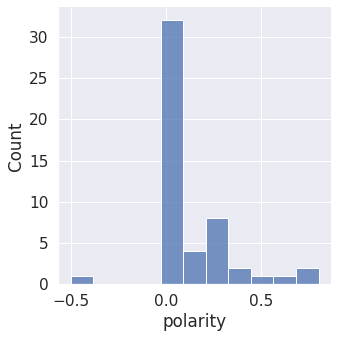

In [ ]:
sns.displot(congress_tweets_sa[(congress_tweets_sa['name_wikipedia']=='Mitch McConnell')], x="polarity")
plt.show()

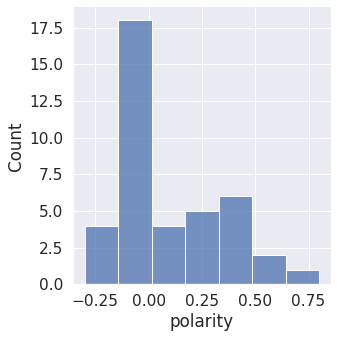

In [ ]:
sns.displot(congress_tweets_sa[(congress_tweets_sa['name_wikipedia']=='Chuck Schumer')], x="polarity")
plt.show()

In [ ]:
#5 most positive tweets
for tweet in congress_tweets_sa.nlargest(5, 'polarity')['lemmas']:
    print(tweet + "\n")

.@cjsomerset mill_springs receive federal funding provided great american_outdoors act gaoa aid preserving civil_war battlefield @senatemajldr_@rephalrogers helped designate battlefield national_monument

win fight people like pastor grant hasty stearns kentucky gathered volunteers distribute homecooked meals

conditions border caused president @realdonaldtrump callous policies unacceptable i’m proud new_yorkers taking streets tonight raise_awareness lightsforliberty

like kentuckians heard inspirational stories recover addiction rebuild lives proud support organizations address substance_abuse crisis help need contribute said @senatemajldr @bgpolitics addiction_treatment centers lexington prestonsburg receive federal funds ^jb

.@senatemajldr_mcconnell bipartisan group_senators leading_charge federal child_nutrition programs efficient flexible better equipped reach children need summer months



In [ ]:
sample_tweet_1 = ".@senatemajldr thought lifetime having debate virtues capitalism goodness sake things like greennewdeal medicarefornone best way avoid @senategop"
print("overall polarity score is ", TextBlob(sample_tweet_1).sentiment.polarity)
for word in sample_tweet_1.split():
    print(word, TextBlob(word).sentiment.polarity)

overall polarity score is  1.0
.@senatemajldr 0.0
thought 0.0
lifetime 0.0
having 0.0
debate 0.0
virtues 0.0
capitalism 0.0
goodness 0.0
sake 0.0
things 0.0
like 0.0
greennewdeal 0.0
medicarefornone 0.0
best 1.0
way 0.0
avoid 0.0
@senategop 0.0


In [ ]:
#5 most negative tweets
for tweet in congress_tweets_sa.nsmallest(5, 'polarity')['lemmas']:
    print(tweet + '\n')

@senatemajldr @usdol @patpizzelladol .@senatemajldr_mitch_mcconnell requests @usdol power support kentucky impacted coal workers difficult uncertain time + national dislocated_worker grant funding constituents eligible

president @realdonaldtrump planning steal military pay pensions pay wall?military members families suffer failed achieve congress congress vote stop

tomorrow crucial vote debate having witnesses_documents_trial senate republicans ensure truth trial witness documents render acquittal president trump meaningless

past time pass heroes act senate

stand dreamers believes country stronger thats aisle reject @realdonaldtrump termination daca.we wo stop fighting @senatordurbin @repzoelofgren leading bipartisan group current senators u.s. representatives filing_amicus_brief scotus support daca asking scotus independence reject president illegal repeal_daca



In [ ]:
sample_complaint_n1 = "@boonecountyky @cityofflorence @senatemajldr @judgegarymoore @nacotweets @cvgairport @dhlus @boonesheriffky @florencerotary @nkychamber @stelizabethnky fighting devastating opioidcrisis kentucky @senatemajldr_mcconnell hosted listening_sessions @boonecountyky help find solutions convinced @ondcp drug_czar add boone hidta_program increasing coordination federal law_enforcement"
print("overall polarity score is ", TextBlob(sample_complaint_n1).sentiment.polarity)
for word in sample_complaint_n1.split():
    print(word, TextBlob(word).sentiment.polarity)

overall polarity score is  -1.0
@boonecountyky 0.0
@cityofflorence 0.0
@senatemajldr 0.0
@judgegarymoore 0.0
@nacotweets 0.0
@cvgairport 0.0
@dhlus 0.0
@boonesheriffky 0.0
@florencerotary 0.0
@nkychamber 0.0
@stelizabethnky 0.0
fighting 0.0
devastating -1.0
opioidcrisis 0.0
kentucky 0.0
@senatemajldr_mcconnell 0.0
hosted 0.0
listening_sessions 0.0
@boonecountyky 0.0
help 0.0
find 0.0
solutions 0.0
convinced 0.0
@ondcp 0.0
drug_czar 0.0
add 0.0
boone 0.0
hidta_program 0.0
increasing 0.0
coordination 0.0
federal 0.0
law_enforcement 0.0


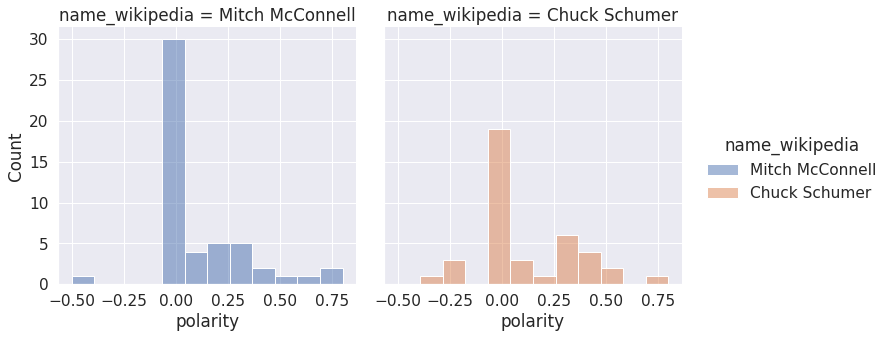

In [ ]:
#Polarity differs between 
#Mitch McConnell---> Republicant
#Chuck Schumer----> Democrat
sns.displot(congress_tweets_sa, x="polarity", hue = "name_wikipedia", col = "name_wikipedia")
plt.show()

<ipython-input-72-175483ea2ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congress_tweets_sa['subjectivity'] = congress_tweets_sa['lemmas'].map(lambda text: TextBlob(text).sentiment.subjectivity)


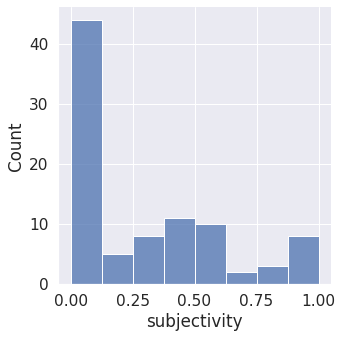

In [ ]:
congress_tweets_sa['subjectivity'] = congress_tweets_sa['lemmas'].map(lambda text: TextBlob(text).sentiment.subjectivity)
sns.displot(congress_tweets_sa, x="subjectivity")
plt.show()

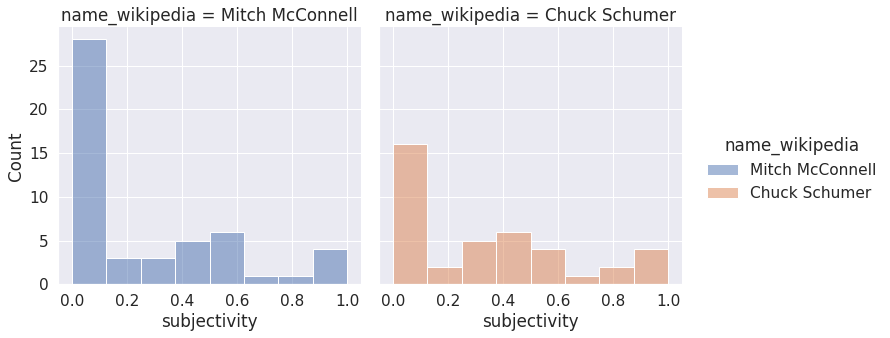

In [ ]:
sns.displot(congress_tweets_sa, x="subjectivity", hue = "name_wikipedia", col = "name_wikipedia")
plt.show()

In [ ]:
congress_tweets_saa=congress_tweets_sa[['name_wikipedia','position','party','lemmas','polarity','subjectivity']]
congress_tweets_saa

,name_wikipedia,position,party,lemmas,polarity,subjectivity
48,Mitch McConnell,Sen,Republican,.@senatemajldr_mitch_mcconnell democrats impea...,0.000,0.000000
277,Mitch McConnell,Sen,Republican,kentucky priorities @senatemajldr_mitch_mcconn...,0.125,0.500000
401,Mitch McConnell,Sen,Republican,like kentuckians heard inspirational stories r...,0.650,1.000000
473,Mitch McConnell,Sen,Republican,troublesome creek times knott county @senatema...,0.000,0.000000
667,Mitch McConnell,Sen,Republican,congressional leader new_york california @sena...,0.250,0.312500
...,...,...,...,...,...,...
9347,Chuck Schumer,Sen,Democrat,need testing work need need hospitals prepared...,0.000,0.000000
9552,Chuck Schumer,Sen,Democrat,"sweep_rug hide facts 130,000 americans died co...",0.000,0.066667
9710,Chuck Schumer,Sen,Democrat,days house passed violence women act reauthori...,0.500,0.500000
9898,Chuck Schumer,Sen,Democrat,family ahmaud_arbery deserves justice joined @...,0.100,0.812500


In [ ]:
corpus = st.CorpusFromPandas(congress_tweets_saa,
                            category_col='name_wikipedia',
                          text_col='lemmas',
                            nlp = nlp).build()

html = st.produce_scattertext_explorer(corpus,
                                       category='Chuck Schumer',
                                       category_name='Chuck Schumer',
                                       not_category_name='Mitch McConnell',
                                        width_in_pixels=1000,
                                        minimum_term_frequency=10,
                                       metadata=congress_tweets_saa['party'],
                                       transform=st.Scalers.dense_rank)

open('./Two_legistators.html', 'wb').write(html.encode('utf-8'))

385572

##Democrats v. Republicans

In [ ]:
congress_tweets['party'].unique() #unique words

array(['Republican', 'Democrat'], dtype=object)

In [ ]:
congress_tweets_dr = congress_tweets[(congress_tweets['party']=='Democrat') | (congress_tweets['party'] == 'Republican')]

In [ ]:
congress_tweets_dr['polarity'] = congress_tweets_dr['lemmas'].map(lambda text: TextBlob(text).sentiment.polarity)
congress_tweets_dr.head()

,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,...,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,lemmas,tweet_len,word_count,polarity,subjectivity,Party_binary,Position_binary
0,624022,1.193880e+18,SenKevinCramer,2019-11-11T08:00:01-05:00,Today we reflect on what it means to be a free...,Kevin Cramer,Sen,3-Jan-19,1/21/1961,M,...,"93,758","124,827","188,163",today reflect means free american remember tha...,138,19,0.133333,0.400000,1,1
1,438674,1.118930e+18,RepPeteStauber,2019-04-18T13:30:43-04:00,WATCH: I joined Border Patrol for a night time...,Pete Stauber,Rep,3-Jan-19,5/10/1966,M,...,"1,367,716","1,546,167","1,320,225",watch joined border_patrol night time tour lea...,70,10,0.000000,0.000000,1,0
2,860928,1.123570e+18,RobWittman,2019-05-01T08:39:28-04:00,Thanks to @potus for recognizing how critical ...,Rob Wittman,Rep,11-Dec-07,2/3/1959,M,...,"1,981,473","1,971,820","1,822,522",thanks @potus recognizing critical uss truman ...,252,30,0.294545,0.581818,1,0
3,732185,1.288900e+18,RepTomRice,2020-07-30T14:10:13-04:00,Herman Cain was a great man and patriot. Our p...,Tom Rice,Rep,3-Jan-13,8/4/1957,M,...,"855,373","865,941","1,071,645",herman_cain great man patriot prayers family,44,6,0.800000,0.750000,1,0
4,732803,1.305650e+18,SenatorTimScott,2020-09-14T19:22:48-04:00,"In an #OpportunityZone in Wilmington, Del., Se...",Tim Scott,Sen,2-Jan-13,9/19/1965,M,...,"855,373","865,941","1,071,645",opportunityzone wilmington del. second chance ...,132,13,0.000000,0.000000,1,1


In [ ]:
congress_tweets_dr.to_csv('congress_tweets_lemmas_sentiment.csv', index=False)

In [ ]:
congress_tweets_dr = pd.read_csv('congress_tweets_lemmas_sentiment.csv')

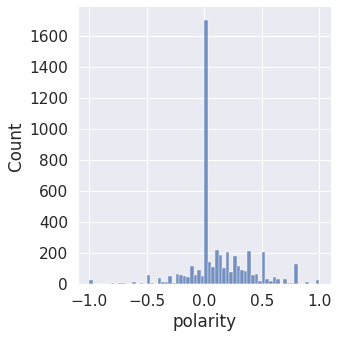

In [ ]:
sns.displot(congress_tweets_dr[(congress_tweets_dr['party']=='Democrat')], x="polarity")
plt.show()

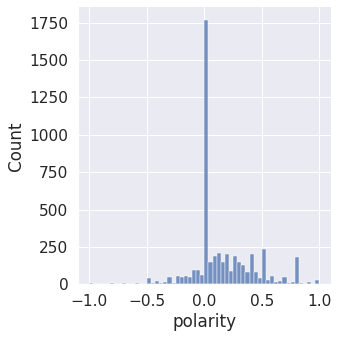

In [ ]:
sns.displot(congress_tweets_dr[(congress_tweets_dr['party']=='Republican')], x="polarity")
plt.show()

In [ ]:
#5 most positive tweets
for tweet in congress_tweets_dr.nlargest(5, 'polarity')['lemmas']:
    print(tweet + "\n")

patriot kash patel media baselessly targets shameful character attacks middle_east serving thanksgiving meals heroes deployed abroad best serve country moment

wonderful morning @txrighttolife @empowertexans discussing shared conservative_values voice unborn fight constitutional_rights congress

happy_95th_birthday wayne lloyd van riper wayne served gen. george s. patton army world_war_ii served valiantly england northern france germany thank wayne dedication service country wish best birthday

wonderful story lifetime service heroism dear_friend @woodywilliams45 thank country 🇺_🇸

excellent news @secpompeo unalienable_rights @realdonaldtrump sec_pompeo state foreign_policy guided founding_principles ideals



In [ ]:
sample_tweet_1 = "wonderful meet rankin family leeco capitol tour week al03"
print("overall polarity score is ", TextBlob(sample_tweet_1).sentiment.polarity)
for word in sample_tweet_1.split():
    print(word, TextBlob(word).sentiment.polarity)

overall polarity score is  1.0
wonderful 1.0
meet 0.0
rankin 0.0
family 0.0
leeco 0.0
capitol 0.0
tour 0.0
week 0.0
al03 0.0


In [ ]:
#5 most negative tweets
for tweet in congress_tweets_dr.nsmallest(5, 'polarity')['lemmas']:
    print(tweet + '\n')

americans struggling mental_health issues including depression social_isolation covid-19 seniors especially vulnerable phone_calls crisis hotlines jumped coronavirus relief bill needs address

strongly_disagree policy legislation think devastating country economy believe constituents deserve know stand ideas laid proposed legislation 2/2

sickness engulfing nation evil evil manifesting increasingly form mass carnage perpetrated cowards honor

presidential_harassment politics worst trying embarrass @realdonaldtrump backfiring turn

month squeal_award draws attention outrageous examples wasteful reckless spending taxpayer_money makeemsqueal



In [ ]:
sample_complaint_n1 = "human_trafficking_awareness day alabama state alabama human_trafficking task_force spend day educating people terrible crisis impact alabama stop"
print("overall polarity score is ", TextBlob(sample_complaint_n1).sentiment.polarity)
for word in sample_complaint_n1.split():
    print(word, TextBlob(word).sentiment.polarity)

overall polarity score is  -1.0
human_trafficking_awareness 0.0
day 0.0
alabama 0.0
state 0.0
alabama 0.0
human_trafficking 0.0
task_force 0.0
spend 0.0
day 0.0
educating 0.0
people 0.0
terrible -1.0
crisis 0.0
impact 0.0
alabama 0.0
stop 0.0


In [ ]:
sample_complaint_n2 = "today marks year deadliest_high_school shooting u.s. history join today pausing remember parkland students teachers killed_injured hundreds survived awful day"
print("overall polarity score is ", TextBlob(sample_complaint_n2).sentiment.polarity)
for word in sample_complaint_n2.split():
    print(word, TextBlob(word).sentiment.polarity)

overall polarity score is  -1.0
today 0.0
marks 0.0
year 0.0
deadliest_high_school 0.0
shooting 0.0
u.s. 0.0
history 0.0
join 0.0
today 0.0
pausing 0.0
remember 0.0
parkland 0.0
students 0.0
teachers 0.0
killed_injured 0.0
hundreds 0.0
survived 0.0
awful -1.0
day 0.0


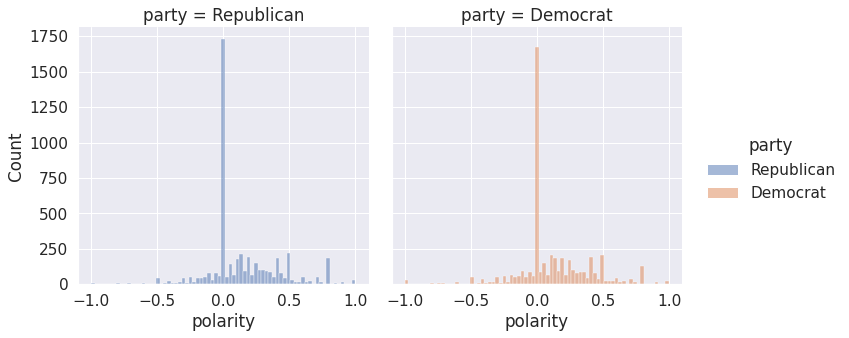

In [ ]:
#Polarity differs between Democrats and Republicans
sns.displot(congress_tweets_dr, x="polarity", hue = "party", col = "party")
plt.show()

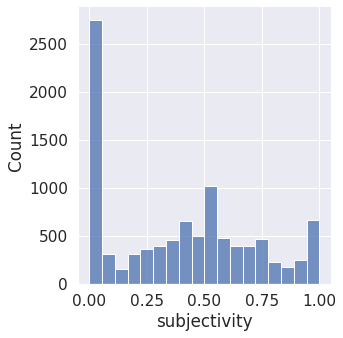

In [ ]:
congress_tweets_dr['subjectivity'] = congress_tweets_dr['lemmas'].map(lambda text: TextBlob(text).sentiment.subjectivity)
sns.displot(congress_tweets_dr, x="subjectivity")
plt.show()

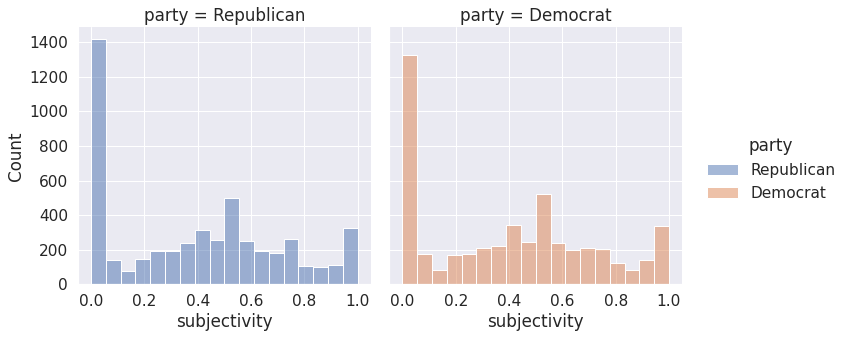

In [ ]:
sns.displot(congress_tweets_dr, x="subjectivity", hue = "party", col = "party")
plt.show()

In [ ]:
congress_tweets_dr.to_csv('congress_tweets_lemmas_sentiment.csv', index=False)

In [ ]:
congress_tweets_dra=congress_tweets_dr[['name_wikipedia','position','party','lemmas','polarity','subjectivity']]
congress_tweets_dra

,name_wikipedia,position,party,lemmas,polarity,subjectivity
0,Kevin Cramer,Sen,Republican,today reflect means free american remember tha...,0.133333,0.400000
1,Pete Stauber,Rep,Republican,watch joined border_patrol night time tour lea...,0.000000,0.000000
2,Rob Wittman,Rep,Republican,thanks @potus recognizing critical uss truman ...,0.294545,0.581818
3,Tom Rice,Rep,Republican,herman_cain great man patriot prayers family,0.800000,0.750000
4,Tim Scott,Sen,Republican,opportunityzone wilmington del. second chance ...,0.000000,0.000000
...,...,...,...,...,...,...
9995,Jerrold Nadler,Rep,Democrat,trump administration targeting vulnerable wome...,-0.333333,0.266667
9996,Nita Lowey,Rep,Democrat,fierce_advocate justice career making inspirat...,0.000000,1.000000
9997,Debbie Dingell,Rep,Democrat,nation president trump promised protect medica...,-0.352778,0.536111
9998,Jimmy Gomez,Rep,Democrat,visited @paralosninosorg westlake meet w/ stud...,0.300000,0.500000


In [ ]:
corpus = st.CorpusFromPandas(congress_tweets_dra,
                            category_col='party',
                          text_col='lemmas',
                            nlp = nlp).build()


html = st.produce_scattertext_explorer(corpus,
                                       category='Democrat',
                                       category_name='Democratic',
                                       not_category_name='Republican',
                                        width_in_pixels=1000,
                                       minimum_term_frequency=10,
                                        metadata=congress_tweets_dra['party'],
                                        transform=st.Scalers.dense_rank)


open('./Democrats_Republicans.html', 'wb').write(html.encode('utf-8'))

2945743

In [ ]:
D_mean = congress_tweets_dra.loc[congress_tweets_dra['party'] == 'Democrat', 'polarity'].mean()
R_mean = congress_tweets_dra.loc[congress_tweets_dra['party'] == 'Republican', 'polarity'].mean()

t_stat, p_val = stats.ttest_ind(congress_tweets_dra.loc[congress_tweets_dra['party'] == 'Democrat', 'polarity'], congress_tweets_dra.loc[congress_tweets_dra['party'] == 'Republican', 'polarity'])

# print results
print("Mean of data1:", D_mean)
print("Mean of data2:", R_mean)
print("t-statistic:", t_stat)
print("p-value:", p_val)

Mean of data1: 0.11793628787905215
Mean of data2: 0.1466905286024161
t-statistic: -5.024687338618114
p-value: 5.129781540043183e-07


##Senators v. Representatives


In [ ]:
congress_tweets['position'].unique() #unique words

array(['Sen', 'Rep'], dtype=object)

In [ ]:
congress_tweets_sr = congress_tweets[(congress_tweets['position']=='Rep') | (congress_tweets['position'] == 'Sen')]

In [ ]:
congress_tweets_sr['polarity'] = congress_tweets_sr['lemmas'].map(lambda text: TextBlob(text).sentiment.polarity)
congress_tweets_sr.head()

,index,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,...,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,lemmas,tweet_len,word_count,polarity,subjectivity,Party_binary,Position_binary
0,624022,1.193880e+18,SenKevinCramer,2019-11-11T08:00:01-05:00,Today we reflect on what it means to be a free...,Kevin Cramer,Sen,3-Jan-19,1/21/1961,M,...,"93,758","124,827","188,163",today reflect means free american remember tha...,138,19,0.133333,0.400000,1,1
1,438674,1.118930e+18,RepPeteStauber,2019-04-18T13:30:43-04:00,WATCH: I joined Border Patrol for a night time...,Pete Stauber,Rep,3-Jan-19,5/10/1966,M,...,"1,367,716","1,546,167","1,320,225",watch joined border_patrol night time tour lea...,70,10,0.000000,0.000000,1,0
2,860928,1.123570e+18,RobWittman,2019-05-01T08:39:28-04:00,Thanks to @potus for recognizing how critical ...,Rob Wittman,Rep,11-Dec-07,2/3/1959,M,...,"1,981,473","1,971,820","1,822,522",thanks @potus recognizing critical uss truman ...,252,30,0.294545,0.581818,1,0
3,732185,1.288900e+18,RepTomRice,2020-07-30T14:10:13-04:00,Herman Cain was a great man and patriot. Our p...,Tom Rice,Rep,3-Jan-13,8/4/1957,M,...,"855,373","865,941","1,071,645",herman_cain great man patriot prayers family,44,6,0.800000,0.750000,1,0
4,732803,1.305650e+18,SenatorTimScott,2020-09-14T19:22:48-04:00,"In an #OpportunityZone in Wilmington, Del., Se...",Tim Scott,Sen,2-Jan-13,9/19/1965,M,...,"855,373","865,941","1,071,645",opportunityzone wilmington del. second chance ...,132,13,0.000000,0.000000,1,1


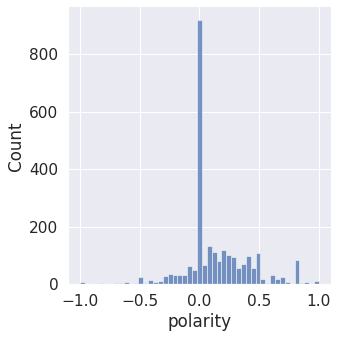

In [ ]:
sns.displot(congress_tweets_sr[(congress_tweets_sr['position']=='Sen')], x="polarity")
plt.show()

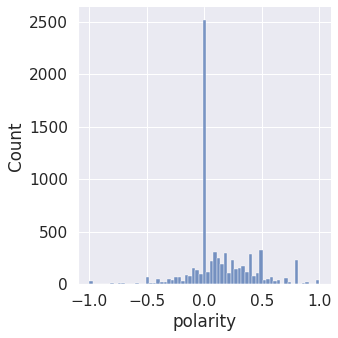

In [ ]:
sns.displot(congress_tweets_sr[(congress_tweets_sr['position']=='Rep')], x="polarity")
plt.show()

In [ ]:
#5 most positive tweets
for tweet in congress_tweets_sr.nlargest(5, 'polarity')['lemmas']:
    print(tweet + "\n")

patriot kash patel media baselessly targets shameful character attacks middle_east serving thanksgiving meals heroes deployed abroad best serve country moment

wonderful morning @txrighttolife @empowertexans discussing shared conservative_values voice unborn fight constitutional_rights congress

happy_95th_birthday wayne lloyd van riper wayne served gen. george s. patton army world_war_ii served valiantly england northern france germany thank wayne dedication service country wish best birthday

wonderful story lifetime service heroism dear_friend @woodywilliams45 thank country 🇺_🇸

excellent news @secpompeo unalienable_rights @realdonaldtrump sec_pompeo state foreign_policy guided founding_principles ideals



In [ ]:
#5 most negative tweets
for tweet in congress_tweets_dr.nsmallest(5, 'polarity')['lemmas']:
    print(tweet + '\n')

americans struggling mental_health issues including depression social_isolation covid-19 seniors especially vulnerable phone_calls crisis hotlines jumped coronavirus relief bill needs address

strongly_disagree policy legislation think devastating country economy believe constituents deserve know stand ideas laid proposed legislation 2/2

sickness engulfing nation evil evil manifesting increasingly form mass carnage perpetrated cowards honor

presidential_harassment politics worst trying embarrass @realdonaldtrump backfiring turn

month squeal_award draws attention outrageous examples wasteful reckless spending taxpayer_money makeemsqueal



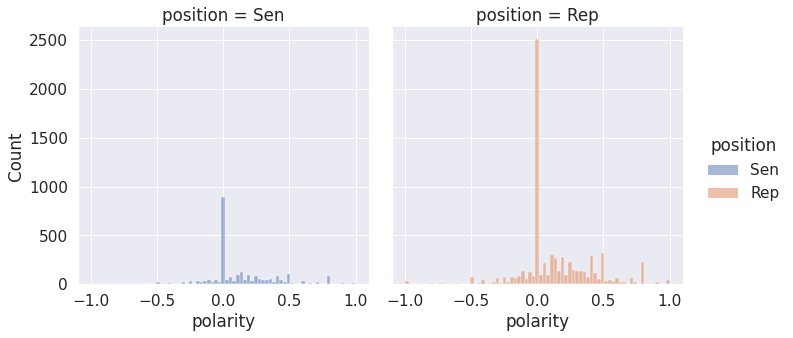

In [ ]:
#Polarity differs between Democrats and Republicans
sns.displot(congress_tweets_sr, x="polarity", hue = "position", col = "position")
plt.show()

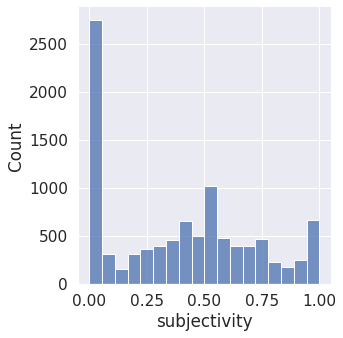

In [ ]:
congress_tweets_sr['subjectivity'] = congress_tweets_sr['lemmas'].map(lambda text: TextBlob(text).sentiment.subjectivity)
sns.displot(congress_tweets_sr, x="subjectivity")
plt.show()

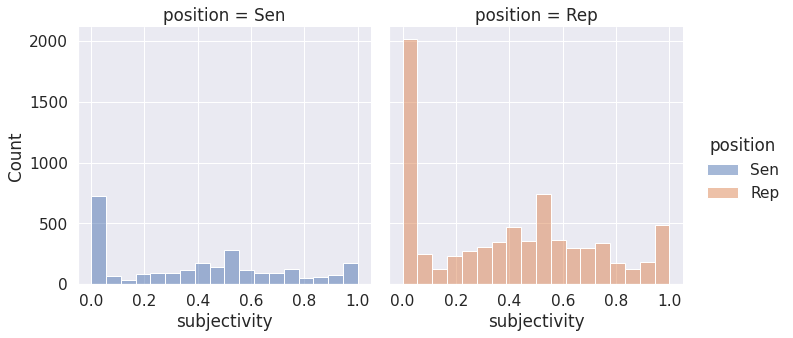

In [ ]:
sns.displot(congress_tweets_sr, x="subjectivity", hue = "position", col = "position")
plt.show()

In [ ]:
congress_tweets_sr.to_csv("congress_tweets_lemmas_sentiment2")

In [ ]:
congress_tweets_sra=congress_tweets_sr[['name_wikipedia','position','party','lemmas','polarity','subjectivity']]
congress_tweets_sra

,name_wikipedia,position,party,lemmas,polarity,subjectivity
0,Kevin Cramer,Sen,Republican,today reflect means free american remember tha...,0.133333,0.400000
1,Pete Stauber,Rep,Republican,watch joined border_patrol night time tour lea...,0.000000,0.000000
2,Rob Wittman,Rep,Republican,thanks @potus recognizing critical uss truman ...,0.294545,0.581818
3,Tom Rice,Rep,Republican,herman_cain great man patriot prayers family,0.800000,0.750000
4,Tim Scott,Sen,Republican,opportunityzone wilmington del. second chance ...,0.000000,0.000000
...,...,...,...,...,...,...
9995,Jerrold Nadler,Rep,Democrat,trump administration targeting vulnerable wome...,-0.333333,0.266667
9996,Nita Lowey,Rep,Democrat,fierce_advocate justice career making inspirat...,0.000000,1.000000
9997,Debbie Dingell,Rep,Democrat,nation president trump promised protect medica...,-0.352778,0.536111
9998,Jimmy Gomez,Rep,Democrat,visited @paralosninosorg westlake meet w/ stud...,0.300000,0.500000


In [ ]:
corpus = st.CorpusFromPandas(congress_tweets_sra,
                            category_col='position',
                          text_col='lemmas',
                            nlp = nlp).build()



html = st.produce_scattertext_explorer(corpus,
                                       category='Sen',
                                       category_name='Senators',
                                       not_category_name='Representatives',
                                        width_in_pixels=1000,
                                       minimum_term_frequency=10,
                                        metadata=congress_tweets_dra['position'],
                                        transform=st.Scalers.dense_rank)


open('./Sen_Rep.html', 'wb').write(html.encode('utf-8'))


2886194

In [ ]:
Sen_mean = congress_tweets_dra.loc[congress_tweets_dra['position'] == 'Sen', 'polarity'].mean()
Rep_mean = congress_tweets_dra.loc[congress_tweets_dra['position'] == 'Rep', 'polarity'].mean()

t_stat, p_val = stats.ttest_ind(congress_tweets_dra.loc[congress_tweets_dra['position'] == 'Sen', 'polarity'], congress_tweets_dra.loc[congress_tweets_dra['position'] == 'Rep', 'polarity'])

# print results
print("Mean of data1:", Sen_mean)
print("Mean of data2:", Sen_mean)
print("t-statistic:", t_stat)
print("p-value:", p_val)

Mean of data1: 0.132102930382591
Mean of data2: 0.132102930382591
t-statistic: -0.043717621703314405
p-value: 0.9651303655936758


#**Part 6:** Feature Engineering

Before going to classification, explore different featurization techniques. Create three dataframes or arrays to represent your text features.

In [ ]:
congressrev['party'].value_counts()

Republican    5000
Democrat      5000
Name: party, dtype: int64

##Dataframe 1: Features engineered from previous analysis

In [ ]:
## Length
congressrev['tweet_len'] = congressrev['lemmas'].apply(len)
congressrev['tweet_len']

0       138
1        70
2       252
3        44
4       132
       ... 
9995    136
9996    125
9997    204
9998    188
9999    405
Name: tweet_len, Length: 10000, dtype: int64

In [ ]:
## Wordcount
congressrev['word_count'] = congressrev['lemmas'].apply(lambda x: len(str(x).split()))
congressrev['word_count']

0       19
1       10
2       30
3        6
4       13
        ..
9995    16
9996    12
9997    22
9998    24
9999    40
Name: word_count, Length: 10000, dtype: int64

In [ ]:
## Polarity
congressrev['polarity'] = congressrev['lemmas'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
## Subjectivity
congressrev['subjectivity'] = congressrev['lemmas'].map(lambda text: TextBlob(text).sentiment.subjectivity)

In [ ]:
#Engineered Text Features
engineered_features = congressrev[['tweet_len', 'word_count', 'polarity', 'subjectivity']].reset_index(drop = True)

##Dataframes 2:  term frequency-inverse document frequency matrices

In [ ]:
import re
def rem_punc_stop(text):
    stop_words = STOP_WORDS
    punc = set(punctuation)
    punc_free = "".join([ch for ch in text if ch not in punc])
    doc = nlp(punc_free)
    spacy_words = [token.text for token in doc]
    no_punc = [word for word in spacy_words if word not in stop_words]
    return no_punc

In [ ]:
## creating our tf-idf matrix
X = congressrev['lemmas']
tf = TfidfVectorizer(tokenizer = rem_punc_stop)
tfidf_matrix =  tf.fit_transform(X)
type(tfidf_matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


scipy.sparse._csr.csr_matrix

In [ ]:
dense_matrix = tfidf_matrix.toarray()

In [ ]:
## applying an LDA model
lda = LatentDirichletAllocation(n_components=5, max_iter=20, random_state=0)
lda = lda.fit(dense_matrix)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

tf_feature_names = tf.get_feature_names_out()
print_top_words(lda, tf_feature_names, 20)
topic_dist = lda.transform(tfidf_matrix)
topic_dist_df = pd.DataFrame(topic_dist).reset_index(drop = True)


Topic #0:
today need work covid19 congress people act health thank trump president american read great support continue protect help time  

Topic #1:
today bill house help time need act senate americans vote work people care covid19 passed smallbusinesses health congress american proud

Topic #2:
president people today american country work realdonaldtrump new working trump great state covid19 health day america need thank americans support

Topic #3:
today women president thank day trump great bill country fight protect realdonaldtrump support right americans time democrats children congress public

Topic #4:
today trump president people health covid19 need great day help work week american care time administration congress coronavirus country americans



In [ ]:
# Using Non-Negative Matrix Factorization 
# We get similar topics with NMF as with LDA, so I use LDA for the topic dataframe. This is just a check.
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, max_iter=1000, init='random', random_state=0)
nmf = nmf.fit(dense_matrix)
tf_feature_names = tf.get_feature_names_out()
print_top_words(nmf, tf_feature_names, 20)
nmf_topic_dist = nmf.transform(tfidf_matrix)
nmf_topic_dist_df = pd.DataFrame(nmf_topic_dist).reset_index(drop = True)


Topic #0:
house bill senate act passed bipartisan vote legislation pass floor time democrats week congress proud introduced republicans support colleagues protect

Topic #1:
health care access public workers affordable coverage protect act insurance patients americans pandemic protectourcare preexistingconditions child people crisis fighting medical

Topic #2:
president trump american people realdonaldtrump administration democrats congress americans time election impeachment said government potus unitedstates facts stop sotu whitehouse

Topic #3:
today thank day great work country nation service honor veterans lives proud join thanks america state members 🇺 🇸 continue

Topic #4:
help need covid19 coronavirus ️ smallbusinesses relief families pandemic   resources workers support federal funding provide ⬇ crisis information response



In [ ]:
# Topic Model + Engineered Features
engineered_features_with_topics = topic_dist_df.join(engineered_features.reset_index(drop = True))

# Non-text features only
non_text_features = congressrev[['romney_2012_state_share', 'obama_2012_state_share',
       'clinton_2016_state_share', 'trump_2016_state_share','joined_congress_date', 'birthday',
       'gender','state']]#, 'district_number'
non_text_features_dummies = pd.get_dummies(non_text_features).reset_index(drop = True)

# Non-text features + text engineered features
non_text_engineered_features = non_text_features_dummies.reset_index(drop = True).join(engineered_features_with_topics)

## Dataframe 3:  An embedding-based featurization (like a document averaged word2vec)

In [ ]:
def rem_punc_stop(text):
    stop_words = STOP_WORDS
    # Individually
    # nlp.Defaults.stop_words.add("XX")
    # nlp.Defaults.stop_words.add("XXXX")
    # nlp.Defaults.stop_words.add("XXXXXXX")
    
    # Using the bitwise |= (or) operator
    nlp.Defaults.stop_words |= {"xx", "xxxx","xxxxxxxx"}
    
    punc = set(punctuation)
    
    punc_free = "".join([ch for ch in text if ch not in punc])
    
    doc = nlp(punc_free)
    
    spacy_words = [token.text.lower() for token in doc]
    
    no_punc = [word for word in spacy_words if word not in stop_words]
    
    return no_punc

In [ ]:
congress_tweets['tokens'] = congress_tweets['lemmas'].map(lambda x: rem_punc_stop(x))
congress_tweets['tokens']

0       [today, reflect, means, free, american, rememb...
1       [watch, joined, borderpatrol, night, time, tou...
2       [thanks, potus, recognizing, critical, uss, tr...
3       [hermancain, great, man, patriot, prayers, fam...
4       [opportunityzone, wilmington, del, second, cha...
                              ...                        
9995    [trump, administration, targeting, vulnerable,...
9996    [fierceadvocate, justice, career, making, insp...
9997    [nation, president, trump, promised, protect, ...
9998    [visited, paralosninosorg, westlake, meet, w, ...
9999    [dr, cardona, outstanding, choice, presidentel...
Name: tokens, Length: 10000, dtype: object

In [ ]:
model = gensim.models.Word2Vec(congress_tweets['tokens'], 
                               vector_size= 100,
                               window = 5, 
                               min_count=0, 
                               sg=0, 
                               alpha=0.025, 
                               epochs = 5, 
                               batch_words = 10000)

In [ ]:
model.save('congress_tweets.emb')

In [ ]:
print(model.wv.__getitem__(['tweet'])) #testing

[[ 0.00670234  0.10462869  0.02027288  0.01091109  0.01667487 -0.15740943
   0.06399164  0.25724432 -0.04807649 -0.04097496 -0.03230105 -0.15185735
   0.0038356   0.06254657  0.02265496 -0.09184758  0.05018727 -0.1857806
  -0.00030213 -0.2537497   0.0746302   0.06588376  0.07024485 -0.07306585
  -0.03725494  0.01269189 -0.0219884  -0.04124973 -0.09181668  0.03511932
   0.10512096  0.02901076 -0.02033194 -0.0898573   0.0093251   0.08805636
   0.00475527 -0.13730836 -0.07950257 -0.25155732 -0.04033046 -0.12774284
  -0.05979957  0.0275421   0.07750417 -0.08470565 -0.09657497 -0.01580033
  -0.00330756  0.08781325  0.02437651 -0.05106055 -0.04820168 -0.03343533
  -0.01496866  0.10360985  0.0578323   0.03462599 -0.12206338  0.0733524
   0.00978589 -0.00912887 -0.05047606  0.05975355 -0.11053663  0.11101665
   0.00470008  0.07515478 -0.12431954  0.1577788  -0.07808872  0.07599542
   0.11757496 -0.10318121  0.05738847  0.02487811 -0.01122235 -0.01022584
  -0.11547678  0.08449235 -0.02682011 -0

In [ ]:
words = list(model.wv.index_to_key) #validity check
print(words[0:100])

['today', 'people', 'president', 'trump', 'work', 'help', 'need', 'time', 'act', 'american', 'covid19', 'health', 'americans', 'bill', 'congress', 'great', 'support', 'house', 'day', 'thank', 'new', 'country', 'care', 'senate', 'continue', 'state', 'families', 'realdonaldtrump', 'proud', 'america', 'working', 'week', 'year', 'nation', ' ', 'democrats', 'workers', 'federal', 'protect', 'like', '️', 'important', 'vote', 'coronavirus', 'ensure', 'funding', 'public', 'pandemic', 'right', 'administration', 'fight', 'family', 'bipartisan', 'crisis', 'join', 'years', 'let', 'legislation', 'women', 'honor', 'access', 'veterans', 'safe', 'know', 'passed', 'provide', 'office', 'lives', 'service', 'local', 'economy', 'students', 'members', 'world', 'w', 'government', 'discuss', 'read', 'national', 'thanks', 'critical', 'resources', 'stop', 'news', 'good', 'learn', 'better', 'visit', 'jobs', 'relief', 'sure', 'live', 'million', 'children', 'colleagues', 'joined', 'want', 'pass', 'home', 'smallbusi

In [ ]:
model.wv.similarity('trump', 'reckless') #testing similarity between two ters

0.9688944

In [ ]:
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in model.wv.index_to_key]
    return numpy.mean(word2vec_model.wv.__getitem__(doc), axis=0)

In [ ]:
# Initialize an array for the size of the corpus
counter = 0

empty_list_embeddings_means = []
for puppy in congress_tweets['tokens']: # append the vector for each document
    print(puppy)
    print(type(puppy))
    print(counter)
    counter = counter + 1
    empty_list_embeddings_means.append(document_vector(model, puppy))
    
doc_average_embeddings = numpy.array(empty_list_embeddings_means) # list to array

Streaming output truncated to the last 5000 lines.
<class 'list'>
8333
['morning', 'met', 'cbpagents', 'advocates', 'ground', 'elpaso', 'challenges', 'face', 'border', 'work', 'improve', 'immigrationsystem', 'demsattheborder']
<class 'list'>
8334
['title', 'says', 'let', 'national', 'number', 'mentalhealth', 'emergencies']
<class 'list'>
8335
['today', 'oversightdems', 'chance', 'look', 'michaelcohen', 'eye', 'closer', 'facts', 'president', 'knows', 'knew', 'let', 'waste', 'minute', 'partisan', 'grandstanding', 'deliver', 'truth', 'american', 'people', 'seeking']
<class 'list'>
8336
['extraordinary', 'actions', 'help', 'mitigatespread', 'coronavirus', 'state']
<class 'list'>
8337
['a32', 'maternalmortalityrate', 'unitedstates', 'continues', 'grow', 'especially', 'blackmothers', 'important', 'ensure', 'mothers', 'children', 'access', 'quality', 'nutrition', 'need', 'maternaljustice']
<class 'list'>
8338
['lookforward', 'working', 'chris', 'mayor', 'work', 'people', 'bring', '22']
<class

In [ ]:
print(congress_tweets.iloc[:169])

      index      tweet_id     screen_name                   datetime  \
0    267362  1.088900e+18    SenatorRisch  2019-01-25T16:01:23-05:00   
1    810511  1.252540e+18      JohnCornyn  2020-04-21T06:23:15-04:00   
2    786834  1.185210e+18    RepPeteOlson  2019-10-18T11:01:55-04:00   
3    821557  1.282690e+18    RepPeteOlson  2020-07-13T11:06:24-04:00   
4    641410  1.232650e+18  WarrenDavidson  2020-02-26T07:48:07-05:00   
..      ...           ...             ...                        ...   
164  448321  1.267800e+18     RepHagedorn  2020-06-02T08:43:51-04:00   
165  341250  1.230570e+18     Rep_Watkins  2020-02-20T14:21:54-05:00   
166  322626  1.247560e+18     RepJimBanks  2020-04-07T12:22:13-04:00   
167  223832  1.203680e+18      RepTedYoho  2019-12-08T09:14:09-05:00   
168  319130  1.194310e+18     RepJimBanks  2019-11-12T12:54:28-05:00   

                                                  text   name_wikipedia  \
0    @ColorFiend I have consistently co-sponsored l...      

In [ ]:
doc_average_embeddings

array([[-0.19873376,  0.52845556,  0.15483022, ..., -0.5089104 ,
         0.358487  ,  0.1048463 ],
       [-0.15464148,  0.38336226,  0.09924268, ..., -0.36835003,
         0.28196627,  0.06436502],
       [-0.11981511,  0.31034708,  0.08671456, ..., -0.2998904 ,
         0.21127981,  0.04938048],
       ...,
       [-0.17848301,  0.47165868,  0.12717144, ..., -0.43838927,
         0.30234417,  0.07505319],
       [-0.13898624,  0.34525612,  0.10161853, ..., -0.34131524,
         0.24175233,  0.06300662],
       [-0.08419881,  0.21773012,  0.06498238, ..., -0.21620087,
         0.1490071 ,  0.03308517]], dtype=float32)

In [ ]:
word2vec_features_df = pd.DataFrame(doc_average_embeddings)

In [ ]:
word2vec_features_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.198734,0.528456,0.154830,0.045515,0.285818,-0.857892,0.179105,1.217962,-0.226851,-0.356596,...,0.611683,0.216603,0.140124,0.360139,0.912029,0.553282,0.005751,-0.508910,0.358487,0.104846
1,-0.154641,0.383362,0.099243,0.023481,0.228947,-0.627505,0.140912,0.900246,-0.159227,-0.281256,...,0.444245,0.160479,0.111960,0.266827,0.668625,0.405101,0.010572,-0.368350,0.281966,0.064365
2,-0.119815,0.310347,0.086715,0.020507,0.174637,-0.495834,0.107145,0.712692,-0.135581,-0.217726,...,0.355962,0.126460,0.085851,0.209799,0.533566,0.321828,0.007196,-0.299890,0.211280,0.049380
3,-0.145846,0.365350,0.110694,0.022777,0.215234,-0.610251,0.122966,0.874940,-0.154504,-0.259251,...,0.436888,0.158774,0.113040,0.257497,0.643731,0.401252,0.000954,-0.360806,0.258405,0.079712
4,-0.054005,0.141565,0.035393,0.010359,0.085497,-0.230524,0.054558,0.339072,-0.052276,-0.112998,...,0.167552,0.055174,0.045446,0.104377,0.249973,0.156302,0.009954,-0.139509,0.107658,0.019908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.166716,0.456638,0.130188,0.040856,0.238323,-0.713095,0.140116,1.004802,-0.217835,-0.296733,...,0.510520,0.183344,0.103231,0.286764,0.768129,0.466789,0.005138,-0.424707,0.279362,0.073548
9996,-0.096376,0.236843,0.075442,0.025545,0.133164,-0.391470,0.080739,0.551190,-0.103270,-0.169507,...,0.277903,0.096556,0.070005,0.161786,0.413486,0.256928,0.012875,-0.240311,0.149118,0.043379
9997,-0.178483,0.471659,0.127171,0.032610,0.244825,-0.724976,0.146122,1.039133,-0.234756,-0.300669,...,0.528805,0.194478,0.111580,0.296717,0.789993,0.482086,-0.001656,-0.438389,0.302344,0.075053
9998,-0.138986,0.345256,0.101619,0.027156,0.197877,-0.567089,0.120032,0.816141,-0.140375,-0.247451,...,0.405350,0.143028,0.101184,0.241584,0.606608,0.371524,0.008947,-0.341315,0.241752,0.063007


In [ ]:
word2vec_features_df.to_csv('word2vec_features_df.csv', index=False)

In [ ]:
word2vec_features_df = pd.read_csv("word2vec_features_df.csv")

In [ ]:
word2vec_features_df.shape

(10000, 100)

# **Part 7:** Classification

Choose a supervised learning algorithm such as logistic regression, random
forest etc. Train six models. For each of the three dataframes you created in the featurization part, train one model to predict whether the author of the
tweet is a Democrat or Republican, and a second model to predict whether
the author is a Senator or Representative. Report the accuracy and other relevant metrics for each of these six models. Choose the featurization technique associated with your best model. Combine those text features with non-text features. 

Train two more models:
(1) A supervised learning algorithm that uses just the non-text features
and (2) a supervised learning algorithm that combines text and non-text
features. Report accuracy and other relevant metrics.

In [ ]:
## Creating dataframes
dataframes = [engineered_features, 
              engineered_features_with_topics,
              word2vec_features_df]
             

featurization_technique = ['Engineered Text Features',
                           'Engineered Features + Topic Model',
                           'word2vec']
                        

In [ ]:
#Creating two binary outcomes that we will later use for prediction

lb_style = LabelBinarizer()


##The first model predicts Party - whether the author is democrat or republican
ydr = congressrev['Party_binary'] = lb_style.fit_transform(congressrev["party"])

##The second model predicts Position -  whether the author is a Senator or Representative
ysr = congressrev['Position_binary'] = lb_style.fit_transform(congressrev["position"])


## Democrat or Republicans

###Model and relevant metrics

Accuracy = 0.5355
F1 Scores = 0.5384997516145056


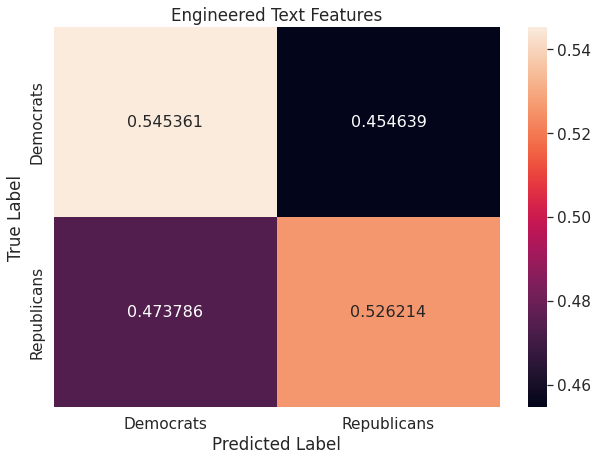

Accuracy = 0.544
F1 Scores = 0.5525024533856723


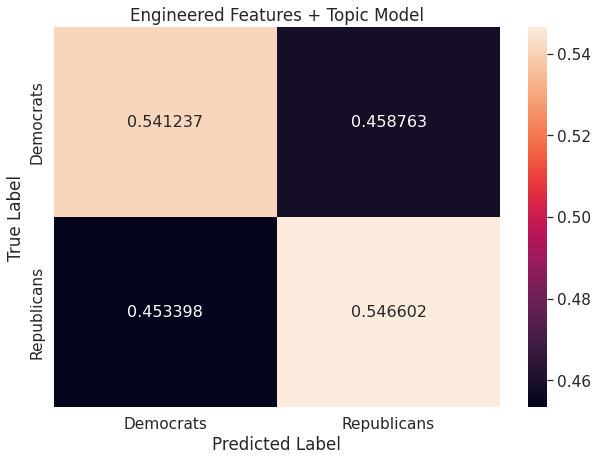

Accuracy = 0.5785
F1 Scores = 0.601418439716312


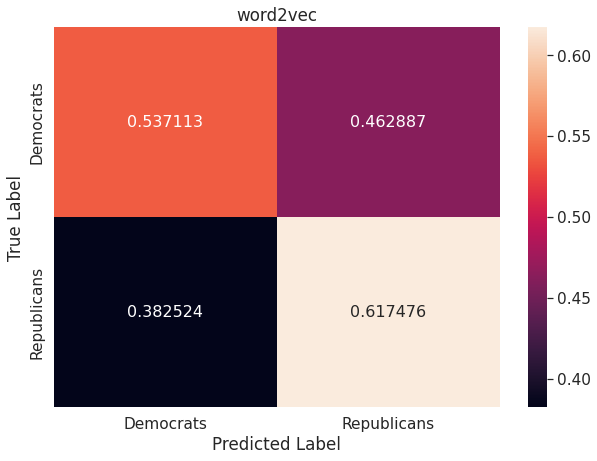

In [ ]:

for dataframe, featurization in zip(dataframes, featurization_technique):
    X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(dataframe, 
                                                        ydr, 
                                                        train_size = .80, 
                                                        test_size=0.20, 
                                                        random_state = 10)
      # create a model
    logit_reg = LogisticRegression()

    # fit the model
    logit_model = logit_reg.fit(X_train_dr.values, y_train_dr.ravel())

    y_pred_dr = logit_model.predict(X_test_dr.values)

    accuracy_metric = accuracy_score(y_test_dr, y_pred_dr, normalize = True)
    print('Accuracy =', accuracy_metric)

    f1scores = f1_score(y_test_dr, y_pred_dr, average='binary')
    print('F1 Scores =', f1scores)

    cf_matrix = confusion_matrix(y_test_dr, y_pred_dr, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2),
                      range(2))
    df_cm = df_cm.rename(index=str, columns={0: "Democrats", 1: "Republicans"})
    df_cm.index = ["Democrats", "Republicans"]
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
 

Accuracy represents the number of correctly classified data instances over the total number of data instances

The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. The closer it is to 1, the better the model

###  Supervised learning algorithm that uses just the non-text features


In [ ]:
## Creating dataframes
dataframes_nontect = [non_text_features_dummies]

featurization_technique_nontext = ['Non-Text Features']

Accuracy = 0.9975
F1 Scores = 0.997569275644142


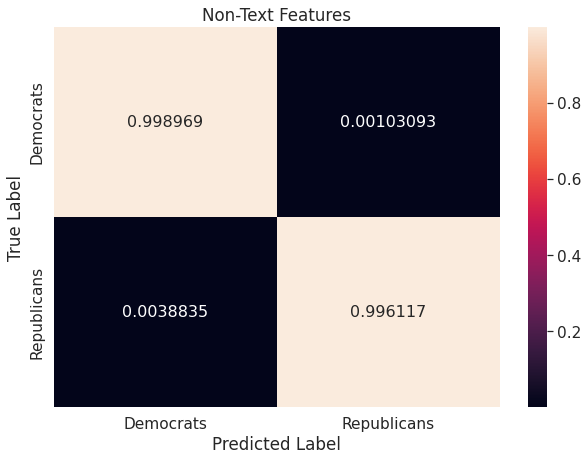

In [ ]:
for dataframe, featurization in zip(dataframes_nontect, featurization_technique_nontext):
    X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(dataframe, 
                                                        ydr, 
                                                        train_size = .80, 
                                                        test_size=0.20, 
                                                        random_state = 10)
      # create a model
    logit_reg = LogisticRegression()

    # fit the model
    logit_model = logit_reg.fit(X_train_dr.values, y_train_dr.ravel())

    y_pred_dr = logit_model.predict(X_test_dr.values)

    accuracy_metric = accuracy_score(y_test_dr, y_pred_dr, normalize = True)
    print('Accuracy =', accuracy_metric)

    f1scores = f1_score(y_test_dr, y_pred_dr, average='binary')
    print('F1 Scores =', f1scores)

    cf_matrix = confusion_matrix(y_test_dr, y_pred_dr, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2),
                      range(2))
    df_cm = df_cm.rename(index=str, columns={0: "Democrats", 1: "Republicans"})
    df_cm.index = ["Democrats", "Republicans"]
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### A supervised learning algorithm that combines text and non-text features. 

In [ ]:
## Creating dataframes
dataframes_combines = [non_text_engineered_features]

featurization_technique_combines = ['Non-Text + Engineered Text Features']

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy = 0.9415
F1 Scores = 0.9425625920471282


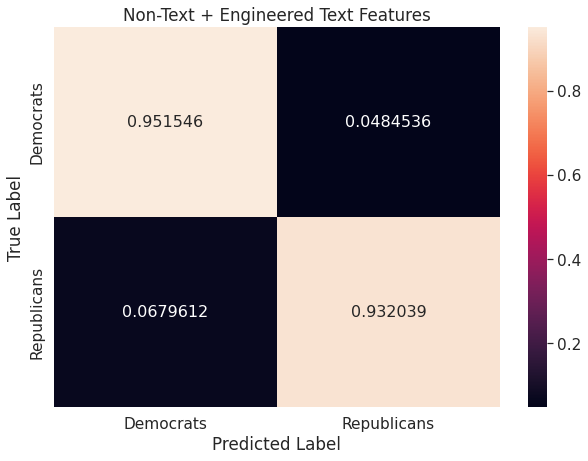

In [ ]:
for dataframe, featurization in zip(dataframes_combines, featurization_technique_combines):
    X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(dataframe, 
                                                        ydr, 
                                                        train_size = .80, 
                                                        test_size=0.20, 
                                                        random_state = 10)
      # create a model
    logit_reg = LogisticRegression()

    # fit the model
    logit_model = logit_reg.fit(X_train_dr.values, y_train_dr.ravel())

    y_pred_dr = logit_model.predict(X_test_dr.values)

    accuracy_metric = accuracy_score(y_test_dr, y_pred_dr, normalize = True)
    print('Accuracy =', accuracy_metric)

    f1scores = f1_score(y_test_dr, y_pred_dr, average='binary')
    print('F1 Scores =', f1scores)

    cf_matrix = confusion_matrix(y_test_dr, y_pred_dr, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2),
                      range(2))
    df_cm = df_cm.rename(index=str, columns={0: "Democrats", 1: "Republicans"})
    df_cm.index = ["Democrats", "Republicans"]
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

 ## Senator or Representative

Accuracy = 0.7405
F1 Scores = 0.0


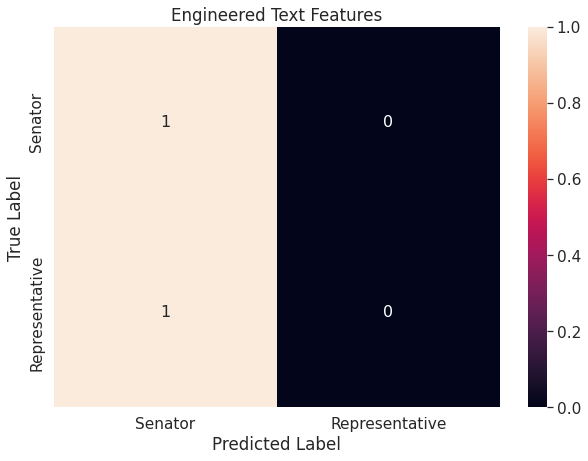

Accuracy = 0.7405
F1 Scores = 0.0


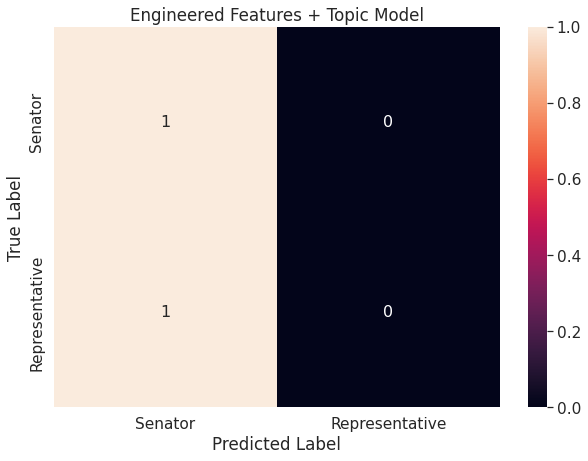

Accuracy = 0.7405
F1 Scores = 0.0


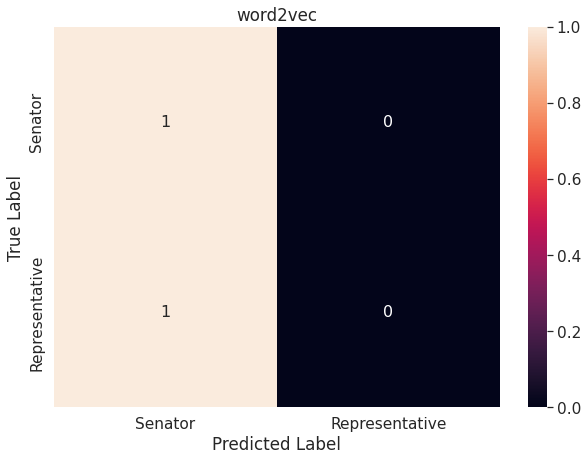

In [ ]:
for dataframe, featurization in zip(dataframes, featurization_technique):
    X_train_sr, X_test_sr, y_train_sr, y_test_sr = train_test_split(dataframe, 
                                                        ysr, 
                                                        train_size = .80, 
                                                        test_size=0.20, 
                                                        random_state = 10)
      # create a model
    logit_reg = LogisticRegression()

    # fit the model
    logit_model = logit_reg.fit(X_train_sr.values, y_train_sr.ravel())

    y_pred_sr = logit_model.predict(X_test_sr.values)

    accuracy_metric = accuracy_score(y_test_sr, y_pred_sr, normalize = True)
    print('Accuracy =', accuracy_metric)

    f1scores = f1_score(y_test_sr, y_pred_sr, average='binary')
    print('F1 Scores =', f1scores)
    
    cf_matrix = confusion_matrix(y_test_sr, y_pred_sr, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2),
                      range(2))
    df_cm = df_cm.rename(index=str, columns={0: "Senator", 1: "Representative"})
    df_cm.index = ["Senator", "Representative"]
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
 

###  Supervised learning algorithm that uses just the non-text features


In [ ]:
## Creating dataframes
dataframes_nontect = [non_text_features_dummies]

featurization_technique_nontext = ['Non-Text Features']

Accuracy = 0.999
F1 Scores = 0.9980694980694981


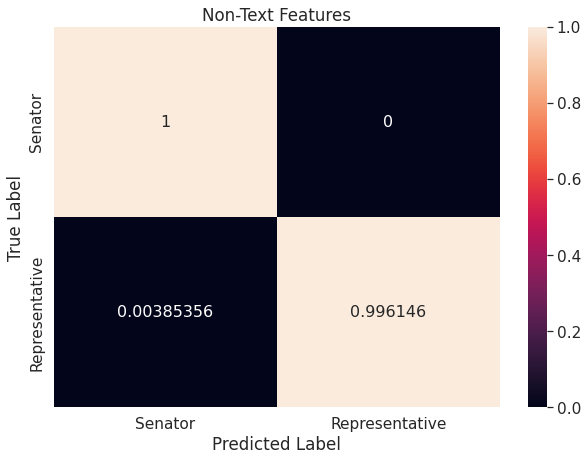

In [ ]:
for dataframe, featurization in zip(dataframes_nontect, featurization_technique_nontext):
    X_train_sr, X_test_sr, y_train_sr, y_test_sr = train_test_split(dataframe, 
                                                        ysr, 
                                                        train_size = .80, 
                                                        test_size=0.20, 
                                                        random_state = 10)
      # create a model
    logit_reg = LogisticRegression()

    # fit the model
    logit_model = logit_reg.fit(X_train_sr.values, y_train_sr.ravel())

    y_pred_sr = logit_model.predict(X_test_sr.values)

    accuracy_metric = accuracy_score(y_test_sr, y_pred_sr, normalize = True)
    print('Accuracy =', accuracy_metric)

    f1scores = f1_score(y_test_sr, y_pred_sr, average='binary')
    print('F1 Scores =', f1scores)

    cf_matrix = confusion_matrix(y_test_sr, y_pred_sr, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2),
                      range(2))
    df_cm = df_cm.rename(index=str, columns={0: "Senator", 1: "Representative"})
    df_cm.index = ["Senator", "Representative"]
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### A supervised learning algorithm that combines text and non-text features. 

In [ ]:
## Creating dataframes
dataframes_combines = [non_text_engineered_features]

featurization_technique_combines = ['Non-Text + Engineered Text Features']

Accuracy = 0.999
F1 Scores = 0.9980694980694981


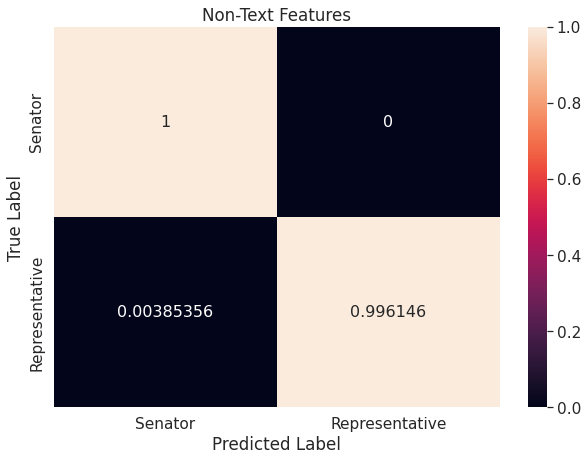

In [ ]:
for dataframe_combines, featurization_technique_combines in zip(dataframes_combines, featurization_technique_combines):
    X_train_sr, X_test_sr, y_train_sr, y_test_sr = train_test_split(dataframe, 
                                                        ysr, 
                                                        train_size = .80, 
                                                        test_size=0.20, 
                                                        random_state = 10)
      # create a model
    logit_reg = LogisticRegression()

    # fit the model
    logit_model = logit_reg.fit(X_train_sr.values, y_train_sr.ravel())

    y_pred_sr = logit_model.predict(X_test_sr.values)

    accuracy_metric = accuracy_score(y_test_sr, y_pred_sr, normalize = True)
    print('Accuracy =', accuracy_metric)

    f1scores = f1_score(y_test_sr, y_pred_sr, average='binary')
    print('F1 Scores =', f1scores)

    cf_matrix = confusion_matrix(y_test_sr, y_pred_sr, normalize = "true")

    df_cm = pd.DataFrame(cf_matrix, range(2),
                      range(2))
    df_cm = df_cm.rename(index=str, columns={0: "Senator", 1: "Representative"})
    df_cm.index = ["Senator", "Representative"]
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, 
               annot=True,
               annot_kws={"size": 16},
               fmt='g')
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# **Part 8:** Discussion Questions

**1. Why do standard preprocessing techniques need to be further customized to a particular corpus?** While standard preprocessing techniques generally involve cleaning, standardizing, and simplifying, the specific approach used should be dictated by the actual data and the research question of interest. 
Tokenization is a commonly used preprocessing technique that involves splitting text into individual words so that each unit or token represents a word (or set of words). A researcher only interested in content within a body of text might then remove all punctuation and stop words so their results identify distinguishable words rather than just frequently occuring ones. Conversely, if one is interested in communication styles or references within the text, it might be important to preserve punctuation or phrases (i.e. chunking) that can help to indicate meaning or parts of speech. 

**2. Did you find evidence for the idea that Democrats and Republicans have
different sentiments in their tweets? What about Senators and Representatives?**

The mean sentiment polarity for Democrats is 0.1153 and the mean for Republicans is 0.1500. The t-statistic is -49.56, which indicates that the difference the more negative sentiment from Democrats is statistically significant (p < 0.0). Therefore, we can reject the null hypothesis that the means of sentiment polarity between Republican and Democrat are equal and conclude that tweets from Democrat members of Congress are more negative. However, there is no statistical difference in the average polarity score between Senators and Representatives.

**3. Why is validating your exploratory and unsupervised learning approaches with a supervised learning algorithm valuable?** It is useful to use a supervised learning algorithm to help assess the performance and accuracy of exploratory and unsupervised learning approaches. Unsupervised learning can help researchers identify patterns in the data (in this case, text); supervised learning enables researchers to potentially validate those patterns/relationships against outcomes. More generally, using both approaches can help to validate our findings if the results are consistent and to rightly cast doubt on findings if the results are contradictory (or incomprehensible). 

**4. Did text only, non-text only, or text and non-text features together perform the best? What is the intuition behind combining text and non-text
features in a supervised learning algorithm?**

In terms of political party, we find the non-text features perform the best, followed by the text and non-text features, followed by the text features based on word embedding (word2vec). In terms of position, we find the non-text features perform best followed by the text and non-text features.

The intuition behind combining text and non-text features is that it can improve the accuracy of predictions. However, we see that is not always the case and might depend more on what non-text features are available. For our analysis, the non-text features included data on share of voters for politicians in recent presidential elections; we assume these factors would be more predictive of political party than the content of tweets.